# Understanding the influence of public policy decisions on Covid19 infections across US states

## Introduction

Covid19 has presented a challenge at global scale not experienced in last 100 years. This pandemic has made significant changes in the way we interact with each other and engage in commerce. US lead the world in the number of Covid19 infections and covid related deaths. 

US response to this pandemic was different from most of the world in one fundamental way. Whereas most countries in the world had federal government leading state and local government in terms of setting up and enforcing policies, US took the opposite approach. The response to the pandemic was orchestrated by state government and thus there is a huge variation in the public policy decision timelines across states. 

US is a very diverse country and states are very different from each other from the perspective of population density, population distribution and other fundamental factors. 

Thus a <u>natural question</u> arises:

**Can we attribute the variation in state level public policy decisions (specifically the duration of shelter in place and duration of non-essesntial business closure) to the variation in infections per capita after accounting for the fundamental differentiators like population density and susceptible population percentage?**

This is an important question towards undersatnding the effect of public policy decisions on the state of infections per state. It is important to state that the public policy features independently might explain a lot of variation in the infection rates in different state. But if we really want to measure the effect of public policy actions, we need to account for the legitimate difference that exist across states. Given COVID19 is a highly contagious disease, polulation density is an obvious affecting factor which might make the difference. 

In our subsequent analysis, we chose to do the following:

1. <b>Dependent Variable</b>: We chose $RatePer100000$ as the dependent variable. It is important to note that we are not working with sheer number of infections rather the infections normalized by population size as we expect this to be more correct approach for our exploration
2. <b>Independent Variables</b>: We are planning to work with the folloing dependent variables:
    1. **Population density per square mile**: Variable type (real numbber); we expect population density to be one of the important predictors of teh infection rate given Covid19 is an infectious disease
    2. **Percent at risk for serious illness due to covid**: Variable type (real number between 0-100); We expect that the next most important aspect is the percent of susceptible population for this highly contagious disease. 
    3. **Percent living under federal poverty line**: Variable type (real number between 0-100); Although a sub-section of US workforce (specially at the upper echelon of pay-scale) was able to work from home, workforce at the lower pay-scale had to disproportionately take the risk and potentially expose themselves to the risky situation. Hence, we expect this feature to be important when comparing the infection rates across states
    4. **Duration of shelter in place order in days (as of 2020-07-06)**: Variable type (Integer); The first policy decision that we examine is the shelter in place order duration across states. We want to check if, after controlling for first 3 variables, we see a statistically significant impact of shelter in place duration on the infection rate
    5. **Duration of mandated face-masks in days (as of 2020-07-06)**: Variable type (Integer); The Second policy decision that we examine is the mandated face-mask duration across states. We want to check if, after controlling for first 3 variables, we see a statistically significant impact of this policy on the infection rate
    
    
### Considerations:
1. Independent variable 2 and 3 might be correlated
2. The public policies that we want to examine might be highly correlated with each other

### Potential issues: 
1. There might be important variables missing from the dataset which might affect our conclusions. We will discuss thsi more in later sections
2. Poor population size might have significantly changed since 2018 as we don't have the most up to date data on it

It will be important to analyse the independent variable relationships to do this right.  

## Exploratory Data Analysis

### 1. Extracting relevant data

Starting with the large data file, we first will focus on extracting the key features that we have discussed earlier to be part of our consideration set.

In [1]:
# collecting the dependent and independent variables

y = c('RatePer100000')
X = c('Population.density.per.square.miles', 
      'Percent.at.risk.for.serious.illness.due.to.COVID', 
      'Percent.living.under.the.federal.poverty.line..2018.', 
      'Stay.at.home..shelter.in.place', 'End.relax.stay.at.home.shelter.in.place', 
      'Mandate.face.mask.use.by.employees.in.public.facing.businesses')
oth = c('State')

filename = 'Lab3_data.csv'

In [2]:
# Reading the full data
data_full <- read.csv(filename) 

In [3]:
# Extracting only relevant columns to the key data frame
data <- data_full[,c(oth, y, X)]

In [4]:
# Changing the column names to be more human readable

colnames(data) <- c('state', 'RatePer100000', 'PopulationDensity', 'PercentAtRisk', 'PercentUnderPoverty', 
                    'ShelterInPlaceStart', 'ShelterInPlaceEnd', 'FaceMaskMandated')

In [5]:
# preliminary data summary
summary(data)

        state    RatePer100000    PopulationDensity  PercentAtRisk  
 Alabama   : 1   Min.   :  66.1   Min.   :    1.11   Min.   :30.00  
 Alaska    : 1   1st Qu.: 467.5   1st Qu.:   51.69   1st Qu.:35.98  
 arizona   : 1   Median : 723.9   Median :   91.11   Median :38.65  
 Arizona   : 1   Mean   : 837.3   Mean   :  386.30   Mean   :38.16  
 Arkansas  : 1   3rd Qu.:1036.4   3rd Qu.:  204.35   3rd Qu.:40.58  
 California: 1   Max.   :4220.4   Max.   :11496.81   Max.   :49.30  
 (Other)   :46                                                      
 PercentUnderPoverty ShelterInPlaceStart ShelterInPlaceEnd  FaceMaskMandated
 Min.   : 7.60       0        :12        0        :16      0        :10     
 1st Qu.:10.97       3/24/2020: 6        5/18/2020: 4      5/1/2020 : 7     
 Median :12.85       3/25/2020: 5        5/4/2020 : 4      5/11/2020: 4     
 Mean   :12.93       3/28/2020: 5        5/1/2020 : 3      5/4/2020 : 3     
 3rd Qu.:14.15       3/30/2020: 4        5/15/2020: 3      5/8/

### 2. Data Cleaning

We see that there are 52 rows of data where each row should represent one US state. Data set included Washignton DC so we expected the data set to contain only 51 rows. After some investigation we find that Arizona has two rows:

In [6]:
# Extracting data rows for arizona
data[3:4,]

,state,RatePer100000,PopulationDensity,PercentAtRisk,PercentUnderPoverty,ShelterInPlaceStart,ShelterInPlaceEnd,FaceMaskMandated
3,Arizona,1367.7,62.91,39.1,14,3/31/2020,5/16/2020,5/8/2020
4,arizona,1367.7,62.91,39.1,14,3/31/2020,5/16/2020,5/8/2020


It seems that both rows have exact same values for all relevant columns. Hence it seems safe to just delete row 4 so that we can have the right dataset. 

In [7]:
data <- data[-c(4),]              # removing row 4 
rownames(data) <- 1:nrow(data)    # renaming the rows of dataframe
summary(data)                     # data summary 

        state    RatePer100000    PopulationDensity  PercentAtRisk  
 Alabama   : 1   Min.   :  66.1   Min.   :    1.11   Min.   :30.00  
 Alaska    : 1   1st Qu.: 458.6   1st Qu.:   48.66   1st Qu.:35.95  
 Arizona   : 1   Median : 717.4   Median :   93.24   Median :38.30  
 Arkansas  : 1   Mean   : 826.9   Mean   :  392.64   Mean   :38.15  
 California: 1   3rd Qu.:1013.2   3rd Qu.:  209.56   3rd Qu.:40.65  
 Colorado  : 1   Max.   :4220.4   Max.   :11496.81   Max.   :49.30  
 (Other)   :45                                                      
 PercentUnderPoverty ShelterInPlaceStart ShelterInPlaceEnd  FaceMaskMandated
 Min.   : 7.60       0        :12        0        :16      0        :10     
 1st Qu.:10.95       3/24/2020: 6        5/18/2020: 4      5/1/2020 : 7     
 Median :12.80       3/25/2020: 5        5/4/2020 : 4      5/11/2020: 4     
 Mean   :12.91       3/28/2020: 5        5/1/2020 : 3      5/4/2020 : 3     
 3rd Qu.:14.20       3/30/2020: 4        5/15/2020: 3      4/17

In [8]:
# Converting the date columns to string types
data$ShelterInPlaceStart<- as.character(data$ShelterInPlaceStart)
data$ShelterInPlaceEnd<- as.character(data$ShelterInPlaceEnd)
data$FaceMaskMandated<- as.character(data$FaceMaskMandated)

### 3. Feature Extraction

<b>Reference Date</b>: Our dependent variable is updated as of 2020/07/06, hence we will use this date as the reference date for calculating duration based features

We want to extract the following features from the data:
1. Duration of shelter in place order in days (as of 2020-07-06)
2. Duration of mandated face masks in days (as of 2020-07-06)

For this we need to look out for the following:

* **Replacement of 0 with the reference date (2020/07/06)**:There are a lot of 0s in the date columns. The interpretation of 0 is that the particular policy is either not yet enforeced (In case of $ShelterInPlaceStart$ and $FaceMaskMandated$) or not yet relaxed (in case of $ShelterInPlaceEnd$). We need to do the following:
    - Replace all the 0 in the date columns with string '2020/07/06' (i.e. 6th July 2020)
    - Convert the date columns to date type 
    - Calculate the differences (in days) between $ShelterInPlaceStart$ and $ShelterInPlaceEnd$ column and the date in $FaceMaskMandated$ with the refence date
    - Check for the negative durations (as this will indicate data quality issues) 

In [9]:
# duration of shelter in place function
sip_func <- function(x){
    ifelse(x[1]=='0', 0, ifelse(x[2]=='0', as.numeric(as.Date('7/6/2020', '%m/%d/%Y')-as.Date(x[1], '%m/%d/%Y')), as.numeric(as.Date(x[2], '%m/%d/%Y') - as.Date(x[1], '%m/%d/%Y'))))
}

In [10]:
# duration of mandated mask
mask_func <- function(x){
    ifelse(x=='0', 0, as.numeric(as.Date('7/6/2020', '%m/%d/%Y')-as.Date(x, '%m/%d/%Y')))
}

In [11]:
# Extracting features
data$ShelterInPlaceDuration <- apply(data[, c('ShelterInPlaceStart', 'ShelterInPlaceEnd')], 1, sip_func)
data$MandatedMaskDuration <- apply(data['FaceMaskMandated'], 1, mask_func)

### Cleaning up and extracting only relevant features

In [12]:
ref <- c('state')
y <- c('RatePer100000')
x_final <- c('PopulationDensity', 'PercentAtRisk', 'PercentUnderPoverty', 'ShelterInPlaceDuration', 'MandatedMaskDuration')

In [13]:
data <- data[, c(ref, y, x_final)]

In [14]:
summary(data)

        state    RatePer100000    PopulationDensity  PercentAtRisk  
 Alabama   : 1   Min.   :  66.1   Min.   :    1.11   Min.   :30.00  
 Alaska    : 1   1st Qu.: 458.6   1st Qu.:   48.66   1st Qu.:35.95  
 Arizona   : 1   Median : 717.4   Median :   93.24   Median :38.30  
 Arkansas  : 1   Mean   : 826.9   Mean   :  392.64   Mean   :38.15  
 California: 1   3rd Qu.:1013.2   3rd Qu.:  209.56   3rd Qu.:40.65  
 Colorado  : 1   Max.   :4220.4   Max.   :11496.81   Max.   :49.30  
 (Other)   :45                                                      
 PercentUnderPoverty ShelterInPlaceDuration MandatedMaskDuration
 Min.   : 7.60       Min.   :  0.00         Min.   : 0.00       
 1st Qu.:10.95       1st Qu.: 25.00         1st Qu.:47.00       
 Median :12.80       Median : 42.00         Median :63.00       
 Mean   :12.91       Mean   : 41.45         Mean   :52.75       
 3rd Qu.:14.20       3rd Qu.: 59.00         3rd Qu.:70.50       
 Max.   :19.70       Max.   :109.00         Max.   :94.00 

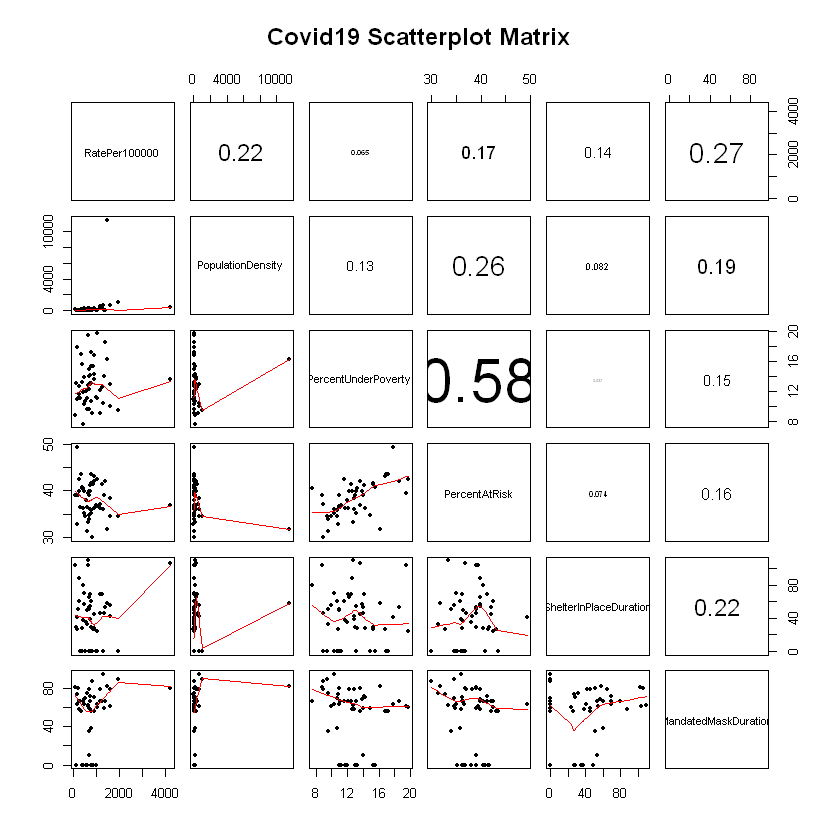

In [15]:
panel.cor <- function(x, y, digits=2, prefix="", cex.cor, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- abs(cor(x, y))
    txt <- format(c(r, 0.123456789), digits=digits)[1]
    txt <- paste(prefix, txt, sep="")
    cex.cor <- 8
    text(0.5, 0.5, txt, cex = cex.cor * r)
}
 
# Plot #2: same as above, but add loess smoother in lower and correlation in upper
pairs(~RatePer100000+PopulationDensity+PercentUnderPoverty+PercentAtRisk+ShelterInPlaceDuration+MandatedMaskDuration, 
      data=data,
      lower.panel=panel.smooth, upper.panel=panel.cor, 
      pch=20, main="Covid19 Scatterplot Matrix")

The whole data seems to be skewed by the includion of Washigton DC and the huge population density. We can see from the cook distance plot that row 9 (i.e. DC) has a lot of influence on the infection rate in the univariate regression setting.

1. We are comparing states and DC is not a state (and significantly different than a state)
2. From cook's distance analysis, it is clear that DC population density is an outlier

We suggest to remove DC from the dataset.

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

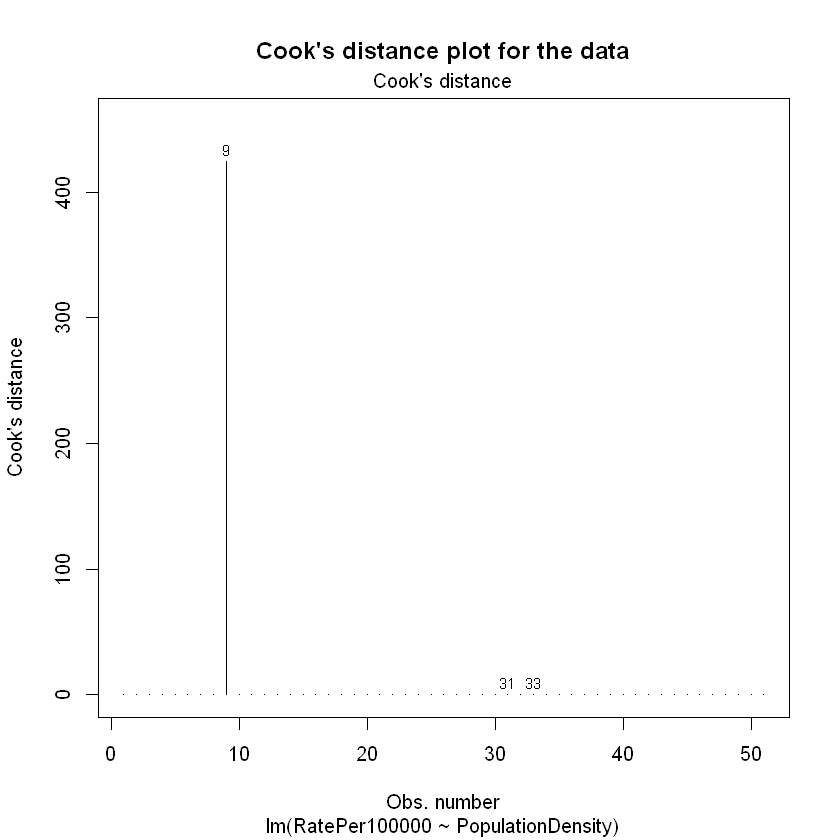

In [16]:
library(car)

fit <- lm(RatePer100000 ~ PopulationDensity, data=data)
cutoff <- 4/((nrow(data)-length(fit$coefficients)-2))
plot(fit, which=4, cook.levels=cutoff, main="Cook's distance plot for the data", )

In [17]:
# Removing DC from the training data
data <- data[!(data$state == 'District of Columbia'),]

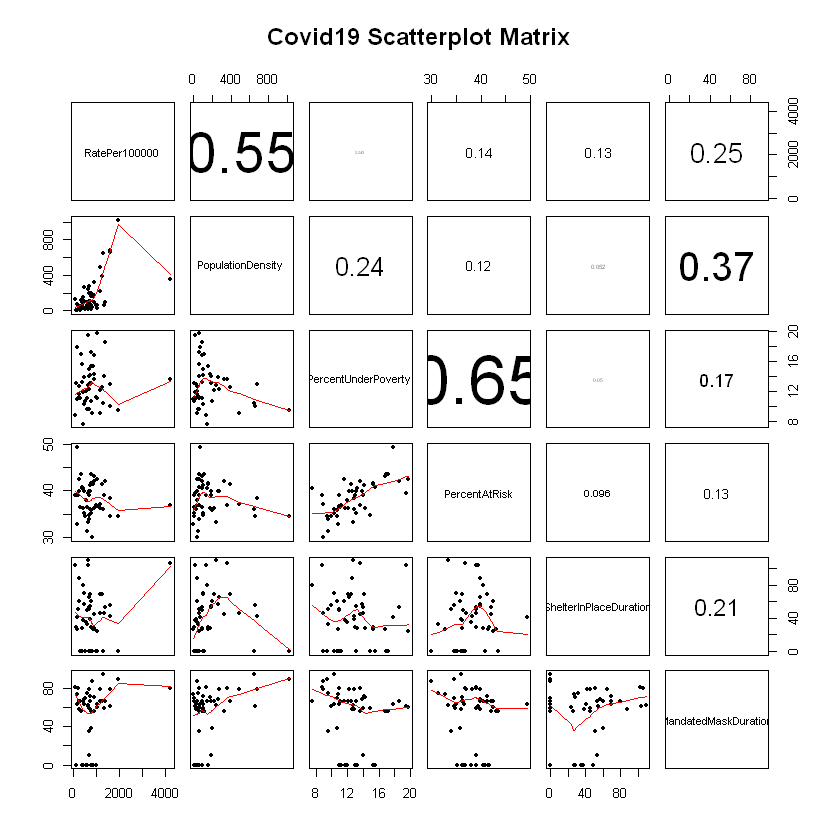

In [18]:
pairs(~RatePer100000+PopulationDensity+PercentUnderPoverty+PercentAtRisk+ShelterInPlaceDuration+MandatedMaskDuration, 
      data=data,
      lower.panel=panel.smooth, upper.panel=panel.cor, 
      pch=20, main="Covid19 Scatterplot Matrix")

In [19]:
write.csv(data, 'final_covid_data.csv', row.names=FALSE)

## Regression Table

In [22]:
library(car)
library(lmtest)
library(sandwich)
library(stargazer)

In [29]:
model1 <- lm(RatePer100000~PopulationDensity, 
            data = data)
se.model1 <- sqrt(diag(vcovHC(model1)))

model2 <- lm(RatePer100000~PopulationDensity+PercentUnderPoverty, 
            data = data)
se.model2 <- sqrt(diag(vcovHC(model2)))

model3 <- lm(RatePer100000~PopulationDensity+PercentUnderPoverty+PercentAtRisk, 
            data = data)
se.model3 <- sqrt(diag(vcovHC(model3)))

model4 <- lm(RatePer100000~PopulationDensity+PercentUnderPoverty+PercentAtRisk+ShelterInPlaceDuration, 
            data = data)
se.model4 <- sqrt(diag(vcovHC(model4)))

model5 <- lm(RatePer100000~PopulationDensity+PercentUnderPoverty+PercentAtRisk+ShelterInPlaceDuration+MandatedMaskDuration, 
            data = data)
se.model5 <- sqrt(diag(vcovHC(model5)))

In [30]:
stargazer(model1, model2, model3, model4, model5, 
          type = "text", 
          omit.stat = "f",
          se = list(se.model1, se.model2, se.model3, se.model4, se.model5),
          star.cutoffs = c(0.05, 0.01, 0.001))


                                                          Dependent variable:                                   
                       -----------------------------------------------------------------------------------------
                                                             RatePer100000                                      
                              (1)               (2)               (3)               (4)               (5)       
----------------------------------------------------------------------------------------------------------------
PopulationDensity          1.707***          1.849***          1.890***          1.873***          1.847***     
                            (0.373)           (0.397)           (0.429)           (0.381)           (0.376)     
                                                                                                                
PercentUnderPoverty                           42.841*           90.544*           97.032       